In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)


In [6]:
!pip install kaggle


import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)


100%|██████████| 48.6k/48.6k [00:00<00:00, 2.41MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [7]:
import os

# Check files inside the downloaded folder
os.listdir(path)

['breast-cancer.csv']

In [8]:
import pandas as pd

file_path = os.path.join(path, "breast-cancer.csv")
df = pd.read_csv(file_path)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.shape

(569, 32)

In [12]:
df.columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [13]:
df.drop(columns=['id'], inplace=True)


In [14]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})


In [15]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

    return results


In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [20]:
results = {}

for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

results_df = pd.DataFrame(results).T
results_df


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:21:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.964912,0.996032,0.975000,0.928571,0.951220,0.924518
Decision Tree,0.929825,0.924603,0.904762,0.904762,0.904762,0.849206
KNN,0.956140,0.982308,0.974359,0.904762,0.938272,0.905824
Naive Bayes,0.921053,0.989087,0.923077,0.857143,0.888889,0.829162
Random Forest,0.973684,0.992890,1.000000,0.928571,0.962963,0.944155
XGBoost,0.973684,0.994048,1.000000,0.928571,0.962963,0.944155


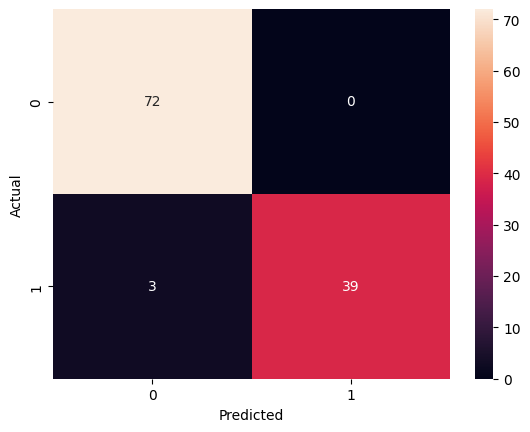

In [21]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
import os

os.makedirs("model", exist_ok=True)

In [28]:
import os
import joblib

# Create model folder
os.makedirs("model", exist_ok=True)

for name, model in models.items():
    model.fit(X_train, y_train)
    safe_name = name.replace(" ", "_")
    joblib.dump(model, f"model/{safe_name}.pkl")

# Save scaler
joblib.dump(scaler, "model/scaler.pkl")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:31:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['model/scaler.pkl']

In [29]:
df.shape

(569, 31)

In [30]:
results_df

,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.964912,0.996032,0.975000,0.928571,0.951220,0.924518
Decision Tree,0.929825,0.924603,0.904762,0.904762,0.904762,0.849206
KNN,0.956140,0.982308,0.974359,0.904762,0.938272,0.905824
Naive Bayes,0.921053,0.989087,0.923077,0.857143,0.888889,0.829162
Random Forest,0.973684,0.992890,1.000000,0.928571,0.962963,0.944155
XGBoost,0.973684,0.994048,1.000000,0.928571,0.962963,0.944155


In [31]:
import os
os.getcwd()

'/content'

In [40]:
os.listdir()

['.config', 'model', 'sample_data']

In [36]:
os.listdir("model")


['Logistic_Regression.pkl',
 'Naive_Bayes.pkl',
 'KNN.pkl',
 'XGBoost.pkl',
 'scaler.pkl',
 'Random_Forest.pkl',
 'Decision_Tree.pkl']

In [37]:
results_df

,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.964912,0.996032,0.975000,0.928571,0.951220,0.924518
Decision Tree,0.929825,0.924603,0.904762,0.904762,0.904762,0.849206
KNN,0.956140,0.982308,0.974359,0.904762,0.938272,0.905824
Naive Bayes,0.921053,0.989087,0.923077,0.857143,0.888889,0.829162
Random Forest,0.973684,0.992890,1.000000,0.928571,0.962963,0.944155
XGBoost,0.973684,0.994048,1.000000,0.928571,0.962963,0.944155


In [41]:
!zip -r 2025AA05724.jpynb.zip model

  adding: model/ (stored 0%)
  adding: model/Logistic_Regression.pkl (deflated 26%)
  adding: model/Naive_Bayes.pkl (deflated 15%)
  adding: model/KNN.pkl (deflated 10%)
  adding: model/XGBoost.pkl (deflated 86%)
  adding: model/scaler.pkl (deflated 30%)
  adding: model/Random_Forest.pkl (deflated 81%)
  adding: model/Decision_Tree.pkl (deflated 65%)


In [44]:
from google.colab import files
files.download("2025AA05724.jpynb.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
!zip -r 2025AA05724.jpynb.zip



zip error: Nothing to do! (2025AA05724.jpynb.zip)
